#### Align ephys events to a master clock

**Choose session to analyze**

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
input_root_dir = Path('/ceph/sjones/projects/FlexiVexi/behavioural_data')

# (Example session with both TTL and heartbeat events):
animal_ID = 'FNT103'
session_ID = '2024-08-21T15-42-56'

**Load recording**
* Load recording object
* Load continuous.dat from stream 'NI-DAQmx-103.PXIe-6341'

In [3]:
import os
from open_ephys.analysis import Session
import pandas as pd

def get_record_node_path(root_folder):
    # Traverse the directory tree
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Check if 'settings.xml' is in the current directory
        if 'settings.xml' in filenames:
            return dirpath
        else:
            print('No recording found')

def get_session_path(root_folder):
    # Traverse the directory tree
    folder_one_level_up = None
    for dirpath, dirnames, filenames in os.walk(root_folder):
        # Check if any file ends with 'settings.xml'
        for filename in filenames:
            if filename.endswith('settings.xml'):
                # Get the folder one level up
                folder_one_level_up = os.path.dirname(dirpath)
                return folder_one_level_up
    if folder_one_level_up is None:
        print('No recording found')



# Find the path to the recording session
session_folder = input_root_dir / animal_ID / session_ID
print(session_folder)
ephys_session_path = get_session_path(session_folder)
print(ephys_session_path)

# load recording
session = Session(ephys_session_path)
recording = session.recordnodes[0].recordings[0]

# Get pandas data frame of continuous.dat on stream 'NI-DAQmx-103.PXIe-6341'
continuous_data = recording.continuous[1].get_samples(start_sample_index=0, end_sample_index=40000)
continuous_data = pd.DataFrame(continuous_data)
continuous_data

/ceph/sjones/projects/FlexiVexi/behavioural_data/FNT103/2024-08-21T15-42-56
/ceph/sjones/projects/FlexiVexi/behavioural_data/FNT103/2024-08-21T15-42-56/Open-Ephys/FNT103_2024-08-21_16-42-50


,0,1,2,3,4,5,6,7
0,6.837062,6.850185,6.835841,6.854762,6.816614,6.849574,6.834925,6.852931
1,6.837062,6.850185,6.835841,6.855373,6.816614,6.849269,6.833705,6.852931
2,6.837062,6.850185,6.836146,6.854762,6.816309,6.849269,6.834315,6.852931
3,6.837367,6.850490,6.835536,6.854762,6.816004,6.849269,6.834315,6.852931
4,6.837062,6.849574,6.836146,6.855373,6.816309,6.849574,6.834315,6.853542
...,...,...,...,...,...,...,...,...
39995,6.837062,6.850185,6.835536,6.855373,6.816004,6.848964,6.834315,6.852321
39996,6.837062,6.849879,6.836451,6.854457,6.815699,6.849269,6.833399,6.852626
39997,6.836451,6.849574,6.835841,6.855373,6.816309,6.848964,6.834315,6.853236
39998,6.837062,6.849574,6.836146,6.854762,6.816004,6.848964,6.834315,6.852626


Each session will have a series of record nodes. For us, just one:

In [4]:
print(session)


Open Ephys Recording Session Object
Directory: /ceph/sjones/projects/FlexiVexi/behavioural_data/FNT103/2024-08-21T15-42-56/Open-Ephys/FNT103_2024-08-21_16-42-50

<object>.recordnodes:
  Index 0: Record Node 103 (binary format)



Each recording object has the following fields:

continuous : continuous data for each subprocessor in the recording  
spikes : spikes for each electrode group  
events : Pandas DataFrame of event times and metadata  

In [5]:
# Get pandas data frame of continuous.dat on stream 'NI-DAQmx-103.PXIe-6341'
continuous_data = recording.continuous[1].get_samples(start_sample_index=0, end_sample_index=40000)
print(continuous_data)
continuous_data = pd.DataFrame(continuous_data)
continuous_data

[[6.83706167 6.85018463 6.83584093 ... 6.84957426 6.83492538 6.8529313 ]
 [6.83706167 6.85018463 6.83584093 ... 6.84926908 6.83370464 6.8529313 ]
 [6.83706167 6.85018463 6.83614612 ... 6.84926908 6.83431501 6.8529313 ]
 ...
 [6.8364513  6.84957426 6.83584093 ... 6.84896389 6.83431501 6.85323648]
 [6.83706167 6.84957426 6.83614612 ... 6.84896389 6.83431501 6.85262611]
 [6.8364513  6.84957426 6.83614612 ... 6.84865871 6.83370464 6.85262611]]


,0,1,2,3,4,5,6,7
0,6.837062,6.850185,6.835841,6.854762,6.816614,6.849574,6.834925,6.852931
1,6.837062,6.850185,6.835841,6.855373,6.816614,6.849269,6.833705,6.852931
2,6.837062,6.850185,6.836146,6.854762,6.816309,6.849269,6.834315,6.852931
3,6.837367,6.850490,6.835536,6.854762,6.816004,6.849269,6.834315,6.852931
4,6.837062,6.849574,6.836146,6.855373,6.816309,6.849574,6.834315,6.853542
...,...,...,...,...,...,...,...,...
39995,6.837062,6.850185,6.835536,6.855373,6.816004,6.848964,6.834315,6.852321
39996,6.837062,6.849879,6.836451,6.854457,6.815699,6.849269,6.833399,6.852626
39997,6.836451,6.849574,6.835841,6.855373,6.816309,6.848964,6.834315,6.853236
39998,6.837062,6.849574,6.836146,6.854762,6.816004,6.848964,6.834315,6.852626


Continuous data for each recording is accessed via the .continuous property of each Recording object. This returns a list of continuous data, grouped by processor/sub-processor. For example, if you have two data streams merged into a single Record Node, each data stream will be associated with a different processor ID. If you're recording Neuropixels data, each probe's data stream will be stored in a separate sub-processor, which must be loaded individually.

Each continuous object has four properties:

samples - a numpy.ndarray that holds the actual continuous data with dimensions of samples x channels. For Binary, NWB, and Kwik format, this will be a memory-mapped array (i.e., the data will only be loaded into memory when specific samples are accessed). 

sample_numbers - a numpy.ndarray that holds the sample numbers since the start of acquisition. This will have the same size as the first dimension of the samples array 

timestamps - a numpy.ndarray that holds global timestamps (in seconds) for each sample, assuming all data streams were synchronized in this recording. 
This will have the same size as the first dimension of the samples array  

metadata - a dict containing information about this data, such as the ID of the processor it originated from.  

##  Loading events

## Loading event data

Event data for each recording is accessed via the `.events` property of each `Recording` object. This returns a pandas DataFrame with the following columns:

- `sample_number` - the sample index at which this event occurred
- `timestamps` - the global timestamp (in seconds) at which this event occurred (defaults to -1 if all streams were not synchronized)
- `channel` - the channel on which this event occurred
- `processor_id` - the ID of the processor from which this event originated
- `stream_index` - the index of the stream from which this event originated
- `state` - 1 or 0, to indicate whether this is a rising edge or falling edge event. 

What is a `line` here? We have 1 and 4 of those,and they both look like they oscillate as a fixed square wave with different periods. 

In [6]:
recording.events

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,575382,14.000125,102,0,PXIe-6341,0
1,1,425432,14.000160,100,1,ProbeA,0
2,1,595382,14.500125,102,0,PXIe-6341,1
3,1,440432,14.500125,100,1,ProbeA,1
4,1,615382,15.000125,102,0,PXIe-6341,0
...,...,...,...,...,...,...,...
645971,1,67700791,2256.519412,100,1,ProbeA,1
645972,1,90296155,2257.019230,102,0,PXIe-6341,0
645973,1,67715791,2257.019414,100,1,ProbeA,0
645974,1,90316156,2257.519255,102,0,PXIe-6341,1


In [7]:
line_4 = recording.events[recording.events["line"]==4]

In [8]:
line_4

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
38,4,942656,23.181975,102,0,PXIe-6341,1
39,4,942661,23.182100,102,0,PXIe-6341,0
40,4,942700,23.183075,102,0,PXIe-6341,1
41,4,942705,23.183200,102,0,PXIe-6341,0
42,4,942744,23.184175,102,0,PXIe-6341,1
...,...,...,...,...,...,...,...
645899,4,89603426,2239.701225,102,0,PXIe-6341,0
645900,4,89603466,2239.702225,102,0,PXIe-6341,1
645901,4,89603470,2239.702325,102,0,PXIe-6341,0
645902,4,89603510,2239.703325,102,0,PXIe-6341,1


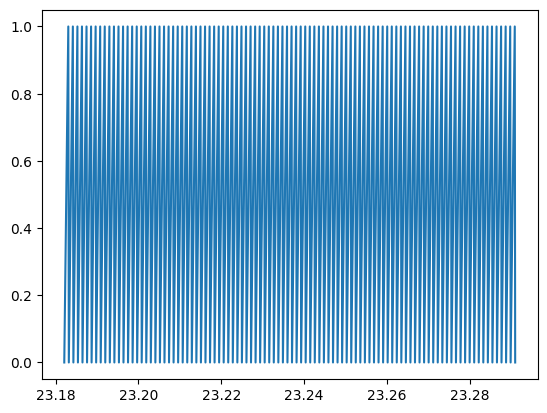

In [9]:
beg =  1
end = 200
plt.plot(line_4['timestamp'][beg:end],line_4['state'][beg:end])

In [10]:
# check whether events exist on line 4
events = recording.events

# get unique elements of stream_name
data_streams = list(set(events['stream_name']))

print(len(data_streams))
print(data_streams)

2
['ProbeA', 'PXIe-6341']


In [11]:
# check whether sync line can be added

# Sync line corresponding to heartbeat signal of ephys clock (1 pulse per second of duration 0.5 seconds). 
# Use this as the master clock (set main = True).
recording.add_sync_line(1,                          # 'Heartbeat' signal line number
                        100,                        # processor ID
                        'ProbeA',                   # stream name
                        main=True)                  # use as the main stream


# Sync line corresponding to TTL pulses
recording.add_sync_line(4,                          # TTL line number
                        102,                        # processor ID
                        'PXIe-6341',                # stream name
                        main=False)                 # synchronize to main stream

#THE PROCESSOR ID IS 102, NOT 103??

In [12]:
recording.compute_global_timestamps(overwrite=False)

Processor ID: 100, Stream Name: ProbeA, Line: 1 (main sync line))
  First event sample number: 440432
  Last event sample number: 66849927
  Total sync events: 2244
  Sample rate: 30000.0
Processor ID: 102, Stream Name: PXIe-6341, Line: 1 (aux sync line))
  First event sample number: 942656
  Last event sample number: 87718198
  Total sync events: 318500
  Scale factor: 0.7589635782213422
  Actual sample rate: 39527.588491540075


In [13]:
event_df = recording.events
event_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state,global_timestamp
0,1,575382,14.000125,102,0,PXIe-6341,0,5.389480
1,1,425432,14.000160,100,1,ProbeA,0,14.181067
2,1,595382,14.500125,102,0,PXIe-6341,1,5.895456
3,1,440432,14.500125,100,1,ProbeA,1,14.681067
4,1,615382,15.000125,102,0,PXIe-6341,0,6.401432
...,...,...,...,...,...,...,...,...
645971,1,67700791,2256.519412,100,1,ProbeA,1,2256.693033
645972,1,90296155,2257.019230,102,0,PXIe-6341,0,2275.216111
645973,1,67715791,2257.019414,100,1,ProbeA,0,2257.193033
645974,1,90316156,2257.519255,102,0,PXIe-6341,1,2275.722112


In [14]:
TTL_pulses = event_df[(event_df['stream_name'] == 'PXIe-6341') & (event_df['line'] == 4)]
TTL_pulses = TTL_pulses.reset_index(drop=True)
TTL_pulses

# save the TTL pulses to a csv file
TTL_pulses.to_csv('TTL_pulses.csv', index=False)

In [17]:
TTL_pulses

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state,global_timestamp
0,4,942656,23.181975,102,0,PXIe-6341,1,14.681067
1,4,942661,23.182100,102,0,PXIe-6341,0,14.681193
2,4,942700,23.183075,102,0,PXIe-6341,1,14.682180
3,4,942705,23.183200,102,0,PXIe-6341,0,14.682306
4,4,942744,23.184175,102,0,PXIe-6341,1,14.683293
...,...,...,...,...,...,...,...,...
636995,4,89603426,2239.701225,102,0,PXIe-6341,0,2257.690908
636996,4,89603466,2239.702225,102,0,PXIe-6341,1,2257.691920
636997,4,89603470,2239.702325,102,0,PXIe-6341,0,2257.692021
636998,4,89603510,2239.703325,102,0,PXIe-6341,1,2257.693033


(0.0, 100.0)

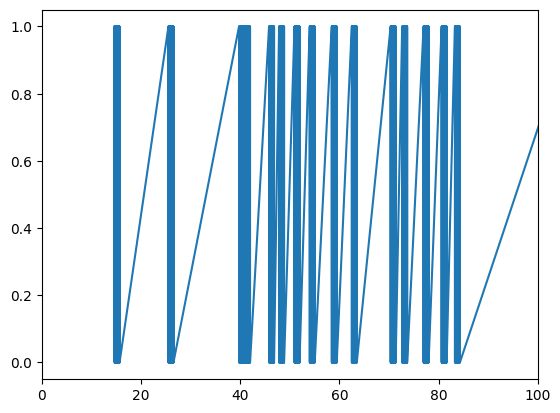

In [20]:


plt.plot(TTL_pulses['global_timestamp'], TTL_pulses['state'])
plt.xlim(0, 100)